In [1]:
import utils
import matplotlib.pyplot as plt

alerts, _ = utils.load_data()
alerts = utils.separate_coords(alerts)

alerts.head(3)

,country,city,reportRating,reportByMunicipalityUser,confidence,reliability,type,uuid,roadType,magvar,subtype,street,pubMillis,endreport,reportDescription,x,y,geometry
0,CI,Antofagasta,1,false,5,10,HAZARD,a123f22e-e5e0-4c6c-8a4e-7434c4fd2110,6,17,HAZARD_ON_ROAD_CONSTRUCTION,Av. República de Croacia,1724417637000,1.724425e+12,NaN,-70.412429,-23.676846,POINT (-7838275.742 -2714079.538)
1,CI,Antofagasta,0,false,0,5,JAM,1d8df954-e380-4327-8015-f4fbadf74f2d,6,4,JAM_HEAVY_TRAFFIC,Av. Edmundo Pérez Zujovic,1724423878000,1.724425e+12,NaN,-70.392283,-23.617475,POINT (-7836033.099 -2706864.568)
2,CI,Antofagasta,0,false,0,5,JAM,c53a5bc6-f6b6-44b8-a5bd-af69b60a4580,1,359,,Pasaje El Volcán,1724425406000,1.724425e+12,NaN,-70.385619,-23.573323,POINT (-7835291.266 -2701501.184)


In [2]:
accidents = utils.extract_event(alerts, ['ACCIDENT'])
jams = utils.extract_event(alerts, ['JAM'])
hazards = utils.extract_event(alerts, ['HAZARD'])

In [3]:
print('Las 10 calles con más accidentes son:')
print(accidents['street'].value_counts().head(10))

Las 10 calles con más accidentes son:
street
Av. Edmundo Pérez Zujovic               141
Av. Pedro Aguirre Cerda                 119
Av. Grecia                               44
Av. Antonio Rendic                       36
Nicolás Tirado                           36
Av. Iquique                              25
Av. Balmaceda                            19
Av. Óscar Bonilla                        19
Circunvalación Padre Alberto Hurtado     18
Av. Argentina                            15
Name: count, dtype: int64


In [4]:
print('Las 10 calles con más atascos son:')
print(jams['street'].value_counts().head(10))

Las 10 calles con más atascos son:
street
Av. Edmundo Pérez Zujovic    1549
Av. Pedro Aguirre Cerda       472
Av. Grecia                    413
Av. Iquique                   307
Av. Antonio Rendic            263
Av. Balmaceda                 172
Av. Argentina                 127
Nicolás Tirado                125
Av. Óscar Bonilla             109
Av. Séptimo de Línea          105
Name: count, dtype: int64


In [5]:
print('Las 10 calles con más peligros son:')
print(hazards['street'].value_counts().head(10))

Las 10 calles con más peligros son:
street
Av. Edmundo Pérez Zujovic               417
Av. Pedro Aguirre Cerda                 173
Av. Argentina                           171
Av. Grecia                              153
Av. Antonio Rendic                      142
Circunvalación Padre Alberto Hurtado     79
Av. Balmaceda                            78
Av. Andrés Sabella                       69
Av. Salvador Allende                     65
Av. Séptimo de Línea                     64
Name: count, dtype: int64


In [6]:
utils.freq_nearby(accidents)

,uuid,street,inicio,fin,x,y,geometry,hour,week_day,day_type,freq
4,e87552f7-4572-4096-9fdd-9400ad90e7f8,Irarrázaval,2024-08-23 11:12:19-04:00,2024-08-23 14:58:45-04:00,-70.385121,-23.603942,POINT (-7835235.829 -2705220.449),11,4,s,4
88,dcc53b30-3046-4d56-bc84-29284233f1f0,Díaz Gana,2024-08-23 14:34:02-04:00,2024-08-23 14:58:45-04:00,-70.403283,-23.665486,POINT (-7837257.614 -2712698.778),14,4,s,9
89,2340df84-4283-49c7-91ed-dff4a345b272,Av. Angamos,2024-08-23 14:33:40-04:00,2024-08-23 14:58:45-04:00,-70.403216,-23.665352,POINT (-7837250.155 -2712682.492),14,4,s,9
96,4a3425e5-838a-4a94-acc6-1c2880648355,Av. Edmundo Pérez Zujovic,2024-08-23 14:43:35-04:00,2024-08-23 14:58:45-04:00,-70.396410,-23.628191,POINT (-7836492.515 -2708166.572),14,4,s,9
101,c83aab00-41d5-4795-8314-1bc05e851a4a,Av. Grecia,2024-08-23 15:29:55-04:00,2024-08-23 14:58:45-04:00,-70.402631,-23.654842,POINT (-7837185.033 -2711405.154),15,4,s,6
...,...,...,...,...,...,...,...,...,...,...,...
9289,677f037a-04d0-4e12-baee-828b4bf2492b,Av. Óscar Bonilla,2024-10-07 08:37:20-03:00,2024-10-05 18:55:23-03:00,-70.380038,-23.572247,POINT (-7834669.992 -2701370.498),8,0,s,0
9293,99ccf747-313b-44c4-85b6-ab79e052c771,Av. Pedro Aguirre Cerda,2024-10-07 08:44:03-03:00,2024-10-05 18:55:23-03:00,-70.390063,-23.587662,POINT (-7835785.97 -2703242.822),8,0,s,20
9373,d8e7dd60-e670-41ff-b5fc-fd85653ce02a,Independencia,2024-10-07 15:44:53-03:00,2024-10-07 15:38:03-03:00,-70.379754,-23.615712,POINT (-7834638.377 -2706650.372),15,0,s,1
9377,3212c1a6-5c04-46fc-8294-8a7e0ff653a5,Av. Séptimo de Línea,2024-10-07 16:10:51-03:00,2024-10-07 15:38:03-03:00,-70.395775,-23.639194,POINT (-7836421.827 -2709503.557),16,0,s,4


In [7]:
accidents = utils.filter_nearby(accidents)
top10 = accidents[['street', 'freq', 'x', 'y', 'geometry']].sort_values('freq', ascending=False).head(10)

accidents10 = top10.copy()
top10


,street,freq,x,y,geometry
32,Nicolás Tirado,46,-70.388786,-23.591896,POINT (-7835643.815 -2703757.127)
71,Av. Edmundo Pérez Zujovic,21,-70.393390,-23.584144,POINT (-7836156.33 -2702815.503)
50,Av. Pedro Aguirre Cerda,19,-70.390059,-23.586442,POINT (-7835785.525 -2703094.632)
5,Av. Edmundo Pérez Zujovic,16,-70.396341,-23.591243,POINT (-7836484.834 -2703677.806)
36,Av. Grecia,15,-70.402744,-23.648818,POINT (-7837197.613 -2710673.071)
66,Jorge Washington,15,-70.400162,-23.647439,POINT (-7836910.186 -2710505.488)
95,Av. Iquique,13,-70.394007,-23.629351,POINT (-7836225.014 -2708307.519)
69,Av. Pedro Aguirre Cerda,10,-70.390902,-23.571555,POINT (-7835879.367 -2701286.452)
57,Av. Pedro Aguirre Cerda,10,-70.390451,-23.582972,POINT (-7835829.162 -2702673.146)
70,Av. Pedro Aguirre Cerda,9,-70.389696,-23.594467,POINT (-7835745.116 -2704069.436)


In [8]:
print('Las 10 coordenadas con más accidentes son:')
for _, row in top10.iterrows():
    print(f'{row['y']}, {row['x']}')

Las 10 coordenadas con más accidentes son:
-23.591896, -70.388786
-23.584144, -70.39339
-23.586442, -70.390059
-23.591243, -70.396341
-23.648818, -70.402744
-23.647439, -70.400162
-23.629351, -70.394007
-23.571555, -70.390902
-23.582972, -70.390451
-23.594467, -70.389696


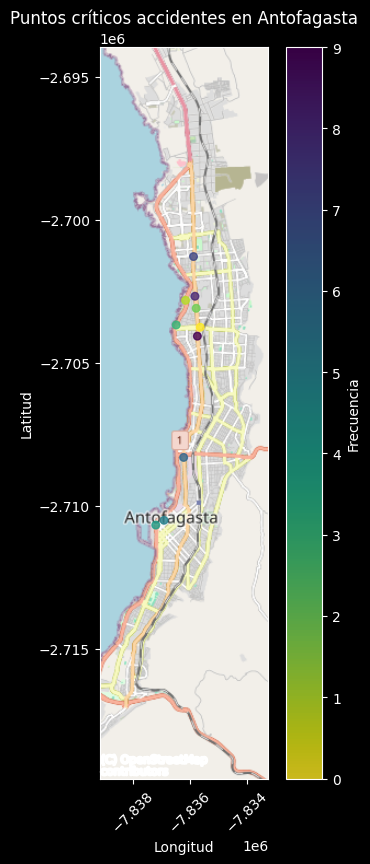

,street,freq,x,y,geometry
32,Nicolás Tirado,46,-70.388786,-23.591896,POINT (-7835643.815 -2703757.127)
71,Av. Edmundo Pérez Zujovic,21,-70.393390,-23.584144,POINT (-7836156.33 -2702815.503)
50,Av. Pedro Aguirre Cerda,19,-70.390059,-23.586442,POINT (-7835785.525 -2703094.632)
5,Av. Edmundo Pérez Zujovic,16,-70.396341,-23.591243,POINT (-7836484.834 -2703677.806)
36,Av. Grecia,15,-70.402744,-23.648818,POINT (-7837197.613 -2710673.071)
66,Jorge Washington,15,-70.400162,-23.647439,POINT (-7836910.186 -2710505.488)
95,Av. Iquique,13,-70.394007,-23.629351,POINT (-7836225.014 -2708307.519)
69,Av. Pedro Aguirre Cerda,10,-70.390902,-23.571555,POINT (-7835879.367 -2701286.452)
57,Av. Pedro Aguirre Cerda,10,-70.390451,-23.582972,POINT (-7835829.162 -2702673.146)
70,Av. Pedro Aguirre Cerda,9,-70.389696,-23.594467,POINT (-7835745.116 -2704069.436)


In [9]:
MARKERSIZE = 30

fig, ax = utils.plot_map(accidents10, 'Puntos críticos accidentes en Antofagasta', markersize=MARKERSIZE, cmap='viridis_r')
plt.show(fig)
accidents10

In [10]:
utils.freq_nearby(jams)

,uuid,street,inicio,fin,x,y,geometry,hour,week_day,day_type,freq
1,1d8df954-e380-4327-8015-f4fbadf74f2d,Av. Edmundo Pérez Zujovic,2024-08-23 10:37:58-04:00,2024-08-23 14:58:45-04:00,-70.392283,-23.617475,POINT (-7836033.099 -2706864.568),10,4,s,106
2,c53a5bc6-f6b6-44b8-a5bd-af69b60a4580,Pasaje El Volcán,2024-08-23 11:03:26-04:00,2024-08-23 14:58:45-04:00,-70.385619,-23.573323,POINT (-7835291.266 -2701501.184),11,4,s,3
3,53b6ff5f-d078-421d-9f78-03e534d78989,Azapa,2024-08-23 11:07:02-04:00,2024-08-23 14:58:45-04:00,-70.384986,-23.616328,POINT (-7835220.801 -2706725.213),11,4,s,24
5,8514589f-8c10-449f-90ff-656d6f68864b,Coquimbo,2024-08-23 11:40:50-04:00,2024-08-23 14:58:45-04:00,-70.399240,-23.657366,POINT (-7836807.549 -2711711.9),11,4,s,46
7,44751e71-7041-439b-90ca-428d0edc674f,Av. Grecia,2024-08-23 12:05:54-04:00,2024-08-23 14:58:45-04:00,-70.402438,-23.650212,POINT (-7837163.549 -2710842.477),12,4,s,52
...,...,...,...,...,...,...,...,...,...,...,...
9436,a6c7fc14-5e11-4632-a035-ecf69836c018,Av. Balmaceda,2024-10-07 18:28:46-03:00,NaT,-70.396737,-23.642529,POINT (-7836528.916 -2709908.818),18,0,s,76
9437,345b770e-5ab6-42c6-8c2c-a06cc87047a5,Pudahuel,2024-10-07 18:30:34-03:00,NaT,-70.391893,-23.576677,POINT (-7835989.685 -2701908.549),18,0,s,86
9438,1bca9570-6a95-42c2-a3bb-9081add8332b,Av. Balmaceda,2024-10-07 18:34:02-03:00,NaT,-70.401189,-23.646375,POINT (-7837024.511 -2710376.188),18,0,s,80
9439,3e3e5595-6274-4bf9-bb80-807691543e07,Av. Argentina,2024-10-07 18:33:23-03:00,NaT,-70.398228,-23.664808,POINT (-7836694.894 -2712616.374),18,0,s,22


In [11]:
jams = utils.filter_nearby(jams)

top10 = jams[['street', 'freq', 'x', 'y', 'geometry']].sort_values('freq', ascending=False).head(10)
jams10 = top10.copy()
top10

,street,freq,x,y,geometry
18,Av. Edmundo Pérez Zujovic,178,-70.395696,-23.633673,POINT (-7836413.033 -2708832.681)
45,Nicolás Tirado,145,-70.388978,-23.591899,POINT (-7835665.188 -2703757.492)
54,Av. Edmundo Pérez Zujovic,141,-70.396247,-23.629337,POINT (-7836474.37 -2708305.818)
71,Av. Séptimo de Línea,114,-70.395981,-23.639417,POINT (-7836444.759 -2709530.655)
27,Av. Edmundo Pérez Zujovic,111,-70.396441,-23.626434,POINT (-7836495.966 -2707953.087)
15,Av. Edmundo Pérez Zujovic,107,-70.395669,-23.636586,POINT (-7836410.027 -2709186.646)
0,Av. Edmundo Pérez Zujovic,106,-70.392283,-23.617475,POINT (-7836033.099 -2706864.568)
13,Av. Grecia,105,-70.402506,-23.655789,POINT (-7837171.118 -2711520.244)
16,Av. Grecia,104,-70.402536,-23.652761,POINT (-7837174.458 -2711152.251)
51,Av. Edmundo Pérez Zujovic,103,-70.394657,-23.588255,POINT (-7836297.372 -2703314.853)


(<Figure size 450x950 with 2 Axes>,
 <Axes: title={'center': 'Puntos críticos congestión en Antofagasta'}, xlabel='Longitud', ylabel='Latitud'>)

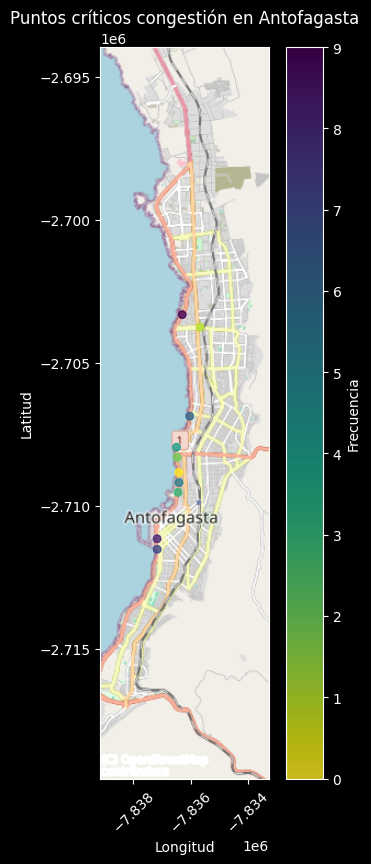

In [12]:
utils.plot_map(jams10, 'Puntos críticos congestión en Antofagasta', markersize=MARKERSIZE, cmap='viridis_r')

In [13]:
print('Las 10 coordenadas con más atascos son:')
for _, row in top10.iterrows():
    print(f'{row['y']}, {row['x']}')

Las 10 coordenadas con más atascos son:
-23.633673, -70.395696
-23.591899, -70.388978
-23.629337, -70.396247
-23.639417, -70.395981
-23.626434, -70.396441
-23.636586, -70.395669
-23.617475, -70.392283
-23.655789, -70.402506
-23.652761, -70.402536
-23.588255, -70.394657


In [14]:
utils.freq_nearby(hazards)

,uuid,street,inicio,fin,x,y,geometry,hour,week_day,day_type,freq
0,a123f22e-e5e0-4c6c-8a4e-7434c4fd2110,Av. República de Croacia,2024-08-23 08:53:57-04:00,2024-08-23 14:58:45-04:00,-70.412429,-23.676846,POINT (-7838275.742 -2714079.538),8,4,s,5
6,cb5046a4-282b-4ec0-a46f-228e3f55a2e5,Av. Antonio Rendic,2024-08-23 11:51:06-04:00,2024-08-23 14:58:45-04:00,-70.386217,-23.621585,POINT (-7835357.835 -2707363.924),11,4,s,11
10,7bb29b98-80ea-4916-8018-a65bc2aee354,Tte. Ernesto Riquelme,2024-08-23 12:05:08-04:00,2024-08-23 14:58:45-04:00,-70.391480,-23.647622,POINT (-7835943.71 -2710527.727),12,4,s,24
16,f470e00b-dbd6-4780-a150-3e75f4675c9a,Av. Balmaceda,2024-08-23 12:16:30-04:00,2024-08-23 14:58:45-04:00,-70.400621,-23.646371,POINT (-7836961.281 -2710375.702),12,4,s,72
19,37d01ed3-78a2-4572-b3bd-ffc095bcd72d,Av. Balmaceda,2024-08-23 12:18:05-04:00,2024-08-23 14:58:45-04:00,-70.400347,-23.646161,POINT (-7836930.78 -2710350.182),12,4,s,71
...,...,...,...,...,...,...,...,...,...,...,...
9401,d236928f-90ea-4367-9c79-5ccbbc2aa96b,Av. Antonio Rendic,2024-10-07 17:28:25-03:00,2024-10-07 15:38:03-03:00,-70.387170,-23.623127,POINT (-7835463.923 -2707551.278),17,0,s,13
9412,11332a3c-9cc9-4f2b-9318-350111eaded3,Av. Pedro Aguirre Cerda,2024-10-07 17:53:58-03:00,2024-10-07 15:38:03-03:00,-70.388743,-23.606913,POINT (-7835639.028 -2705581.38),17,0,s,6
9413,f13e56d3-20ed-4855-8273-12dc702baf6c,Av. Edmundo Pérez Zujovic,2024-10-07 18:00:38-03:00,2024-10-07 15:38:03-03:00,-70.395873,-23.573803,POINT (-7836432.736 -2701559.482),18,0,s,22
9415,1b65d5fc-af32-4f59-beef-eccdf3813673,Huamachuco,2024-10-07 18:05:27-03:00,2024-10-07 15:38:03-03:00,-70.381170,-23.585326,POINT (-7834796.006 -2702959.075),18,0,s,4


In [15]:
hazards = utils.filter_nearby(hazards)

top10 = hazards[['street', 'freq', 'x', 'y', 'geometry']].sort_values('freq', ascending=False).head(10)
hazards10 = top10.copy()
top10

,street,freq,x,y,geometry
3,Av. Balmaceda,72,-70.400621,-23.646371,POINT (-7836961.281 -2710375.702)
80,Estacionamientos Lider,56,-70.396482,-23.636520,POINT (-7836500.53 -2709178.626)
6,Av. Balmaceda,51,-70.397701,-23.643416,POINT (-7836636.228 -2710016.606)
48,Av. Edmundo Pérez Zujovic,51,-70.396223,-23.629707,POINT (-7836471.698 -2708350.776)
16,Av. Edmundo Pérez Zujovic,50,-70.396215,-23.590976,POINT (-7836470.808 -2703645.373)
14,14 de Febrero,49,-70.393211,-23.650246,POINT (-7836136.404 -2710846.609)
28,Av. Grecia,42,-70.402526,-23.652546,POINT (-7837173.345 -2711126.122)
32,Av. Grecia,42,-70.402686,-23.655293,POINT (-7837191.156 -2711459.964)
5,Av. Antonio Rendic,41,-70.389409,-23.628164,POINT (-7835713.167 -2708163.291)
36,Av. Séptimo de Línea,40,-70.395866,-23.639036,POINT (-7836431.957 -2709484.357)


(<Figure size 450x950 with 2 Axes>,
 <Axes: title={'center': 'Puntos críticos peligros en Antofagasta'}, xlabel='Longitud', ylabel='Latitud'>)

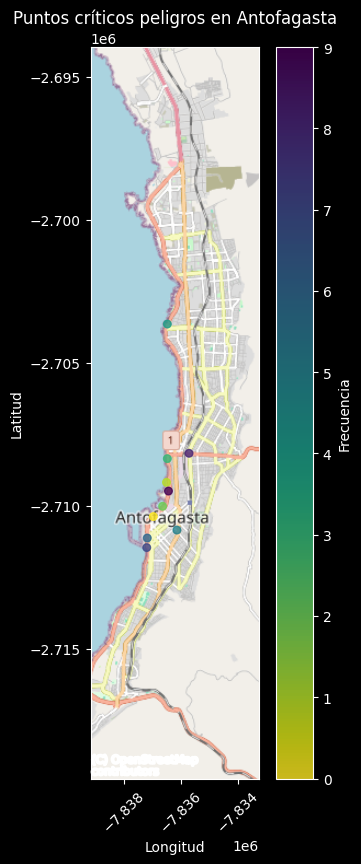

In [16]:
utils.plot_map(hazards10, 'Puntos críticos peligros en Antofagasta', markersize=MARKERSIZE, cmap='viridis_r')

In [17]:
print('Las 10 coordenadas con más peligros son:')
for _, row in top10.iterrows():
    print(f'{row['y']}, {row['x']}')

Las 10 coordenadas con más peligros son:
-23.646371, -70.400621
-23.63652, -70.396482
-23.643416, -70.397701
-23.629707, -70.396223
-23.590976, -70.396215
-23.650246, -70.393211
-23.652546, -70.402526
-23.655293, -70.402686
-23.628164, -70.389409
-23.639036, -70.395866
